In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
plane = np.load("plane.npy")
print(plane)

[[ 7.   56.25 67.54]
 [ 8.   55.53 66.57]
 [ 9.   54.8  65.59]
 [10.   54.06 64.59]
 [11.   53.34 63.62]
 [12.   52.69 62.74]
 [13.   51.94 61.72]
 [14.   51.28 60.82]]


#### problem1

In [3]:
def pro_1(x_0):
    x = sy.symbols('x')
    f_x = sy.lambdify(x, (sy.sin(x) + 1) ** (sy.sin(sy.cos(x))))
    f_x_p = sy.diff((sy.sin(x) + 1) ** (sy.sin(sy.cos(x))))
    f_x_diff = sy.lambdify(x, f_x_p)
    return f_x_diff(x_0)

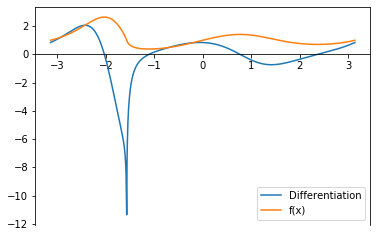

In [4]:
x = sy.symbols('x')
f_x = sy.lambdify(x, (sy.sin(x) + 1) ** (sy.sin(sy.cos(x))))
x_plot = np.linspace(-math.pi, math.pi, 1000)
plt.plot(x_plot, pro_1(x_plot), label = "Differentiation")
plt.plot(x_plot, f_x(x_plot), label = "f(x)")
plt.legend()
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.show()

#### problem 2

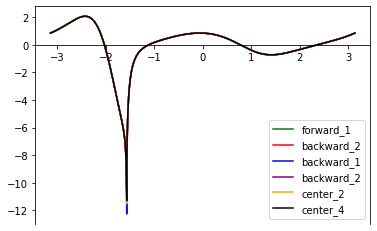

In [5]:
def forward_1(func, x, h):
    return (func(x + h) - func(x)) / h

def forward_2(func, x, h):
    return (-3 * func(x) + 4 * func(x + h) - func(x + 2 * h)) / 2 / h

def backward_1(func, x,  h):
    return (func(x) - func(x - h)) / h

def backward_2(func, x, h):
    return (3 * func(x) - 4 * func(x - h) + func(x - 2 * h)) / 2 / h

def center_2(func, x, h):
    return (func(x + h) - func(x - h)) / 2 / h

def center_4(func, x, h):
    return (func(x - 2 * h) - 8 * func(x - h) + 8 * func(x + h) - func(x + 2 * h)) / 12 / h


#h_array = np.full((1000,), 0.001)
forward_1_val = forward_1(f_x, x_plot, 0.001)
backward_1_val = backward_1(f_x, x_plot, 0.001)
forward_2_val = forward_2(f_x, x_plot, 0.001)
backward_2_val = backward_2(f_x, x_plot, 0.001)
center_2_val = center_2(f_x, x_plot, 0.001)
center_4_val = center_4(f_x, x_plot, 0.001)
plt.plot(x_plot, forward_1_val, color = "green", label = "forward_1")
plt.plot(x_plot, backward_2_val, color = "red", label = "backward_2")
plt.plot(x_plot, backward_1_val, color = "blue", label = "backward_1")
plt.plot(x_plot, backward_2_val, color = "purple", label = "backward_2")
plt.plot(x_plot, center_2_val, color = "orange", label = "center_2")
plt.plot(x_plot, center_4_val, color = "black", label = "center_4")

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.legend()
plt.show()

#### Six different methods of differentiation give very similar answers.

#### problem 3

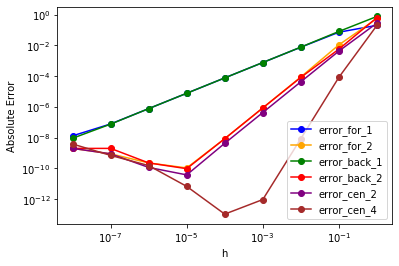

In [6]:
# h_array = np.logspace(-8, 1, 9)
x_0 = 1
# x_0 = np.full((9,), 1)
def pro_3(x_0):
    h_array = np.logspace(-8, 0, 9)
    error_for_1 = abs(pro_1(x_0) - forward_1(f_x, x_0, h_array))
    error_for_2 = abs(pro_1(x_0) - forward_2(f_x, x_0, h_array))
    error_back_1 = abs(pro_1(x_0) - backward_1(f_x, x_0, h_array))
    error_back_2 = abs(pro_1(x_0) - backward_2(f_x, x_0, h_array))
    error_cen_2 = abs(pro_1(x_0) - center_2(f_x, x_0, h_array))
    error_cen_4 = abs(pro_1(x_0) - center_4(f_x, x_0, h_array))
    plt.loglog(h_array, error_for_1, "o-", color = "blue", label = "error_for_1")
    plt.loglog(h_array, error_for_2, "o-", color = "orange", label = "error_for_2")
    plt.loglog(h_array, error_back_1, "o-", color = "green", label = "error_back_1")
    plt.loglog(h_array, error_back_2, "o-", color = "red", label = "error_back_2")
    plt.loglog(h_array, error_cen_2, "o-", color = "purple", label = "error_cen_2")
    plt.loglog(h_array, error_cen_4, "o-", color = "brown", label = "error_cen_4")
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.legend()

pro_3(1)

#### problem 4

In [7]:
alpha = np.deg2rad(plane[:, 1])
beta = np.deg2rad(plane[:, 2])
y = sy.symbols("y")
x_lambda = sy.lambdify((x, y), 500 * sy.tan(y) / (sy.tan(y) - sy.tan(x)))
y_lambda = sy.lambdify((x, y), 500 * sy.tan(y) * sy.tan(x) / (sy.tan(y) - sy.tan(x)))
x = x_lambda(alpha, beta)
y = y_lambda(alpha, beta)

In [8]:
x_for_7 = x[1] - x[0]
y_for_7 = y[1] - y[0]
x_back_14 = x[-1] - x[-2]
y_back_14 = y[-1] - y[-2]
x_diff = (x[2:] - x[:-2]) / 2
y_diff = (y[2:] - y[:-2]) / 2
x_diff = np.hstack([x_for_7, x_diff, x_back_14])
y_diff = np.hstack([y_for_7, y_diff, y_back_14])

In [9]:
speed = np.sqrt((x_diff ** 2 + y_diff ** 2))
for i in range(8):
    if i == 0:
        print("t    speed")
    print(f'{i + 7}  {speed[i]}')

t    speed
7  46.42420062213465
8  47.00103938095283
9  48.998805140367324
10  50.09944162965305
11  48.29035083820508
12  51.5645590492724
13  53.92303354505359
14  51.51480056963612


#### problem 5

In [10]:
def func_map(arr):
    x = arr[0]
    y = arr[1]
    return np.array([x ** 2, x **  3 - y])

def jacobian(func, x_0, h):
    result = np.zeros([len(x_0)])
    for j in range(len(x_0)):
        ej = np.zeros(len(x_0))
        ej[j] += 1
        apprx = (func(x_0 + h * ej) - func(x_0 - h * ej)) / (2 * h)
        result = np.vstack((result, apprx))
    result = np.delete(result, 0, axis = 0)
    result = np.transpose(result)
    return result

jacobian(func_map, (1, 1), 0.1)

array([[ 2.  ,  0.  ],
       [ 3.01, -1.  ]])

#### This jacobian function gives the same answer as the sympy differentiation.

#### problem 7

In [11]:
import autograd as ad
from autograd import numpy as adnp
import random
import time

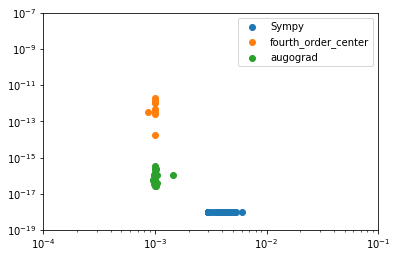

In [23]:
f_auto = lambda x: (adnp.sin(x) + 1) ** (adnp.sin(adnp.cos(x)))
def pro_7(N):
    exact_time = []
    center_time = []
    auto_time = []
    center_error = []
    auto_error = []
    sym_error = np.full((N,), 1e-18).tolist()
    for i in range(N):
        np.random.seed(seed = 100)
        x_0 = random.random()
        
        t1_start = time.time()
        exact_diff = pro_1(x_0)
        t1_stop = time.time()
        exact_time.append(t1_stop - t1_start)
        
        t2_start = time.time()
        center_4_diff = center_4(f_x, x_0, 0.0001)
        t2_stop = time.time()
        center_error.append(abs(pro_1(x_0) - center_4_diff))
        center_time.append(t2_stop - t2_start)
        
        df_dx = ad.grad(f_auto)
        t3_start = time.time()
        auto_diff = df_dx(x_0)
        t3_stop = time.time()
        auto_error.append(abs(exact_diff - auto_diff))
        auto_time.append(t3_stop - t3_start)
    plt.xscale("log")
    plt.xscale("log")
    plt.scatter(exact_time, sym_error, label = "Sympy")
    plt.scatter(center_time, center_error, label = "fourth_order_center")
    plt.scatter(auto_time, auto_error, label = "augograd")
    plt.xlim(10 ** -4, 10 ** -1)
    plt.ylim(10 ** -19, 10 ** -7)
    plt.loglog()
    plt.legend()
    plt.show()

    
pro_7(200)

#### Sympy gives the minimum error but it takes longer than other two. Autograd is the approach with the smaller errors and fast speed. The fourth-center differentiation has relatively larger errors.